In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df = df[df.makespan != "/"]
df.iteration = df.iteration.apply(lambda x: None if '/' in x else x)
df['makespan'] = pd.to_numeric(df['makespan'])
df['iteration'] = pd.to_numeric(df['iteration'])
df['option'] = df['number of jobs'].astype(str) + 'x' + df['number of machines'].astype(str)

In [3]:
df

,method,number of jobs,number of machines,game,time,makespan,iteration,option
0,Brute-force,5,3,G1,0.003770113,6.525391,NaN,5x3
1,MMAS,5,3,G1,0.16552658081054689,6.619349,31.0,5x3
2,iML,5,3,G1,17,6.783435,1.0,5x3
3,Brute-force,5,3,G2,0.003872156,6.160295,NaN,5x3
4,MMAS,5,3,G2,0.15639988581339517,6.245321,24.0,5x3
...,...,...,...,...,...,...,...,...
115,GA,5,3,G1,/,6.525390,20.0,5x3
116,GA,5,3,G2,/,6.160295,25.0,5x3
117,GA,5,3,G3,/,6.882697,59.0,5x3
118,GA,5,3,G4,/,6.941487,4.0,5x3


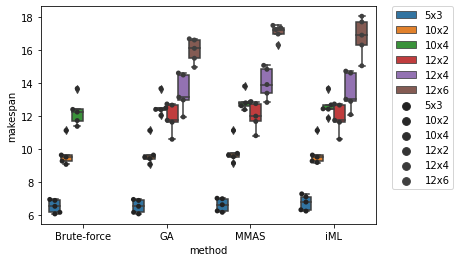

In [5]:
ax = sns.boxplot(x="method", y="makespan", hue="option", data=df, order=["Brute-force", "GA", "MMAS", "iML"])
ax = sns.swarmplot(x="method", y="makespan", hue="option", data=df, order=["Brute-force", "GA", "MMAS", "iML"], color=".25", dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('results.png', dpi=400, facecolor=ax.get_facecolor(), bbox_inches="tight")

In [6]:
df.groupby(["method", "number of jobs", "number of machines"]).agg({'makespan': ['mean', 'std'], 'iteration': ['mean']})

makespan           iteration
                                                    mean       std      mean
method      number of jobs number of machines                               
Brute-force 5              3                    6.514659  0.402163       NaN
            10             2                    9.719188  0.814475       NaN
                           4                   12.281409  0.876771       NaN
GA          5              3                    6.514658  0.402163      25.8
            10             2                    9.748645  0.796556      45.0
                           4                   12.594266  0.625113      61.2
            12             2                   11.869646  0.877284      42.4
                           4                   13.430101  1.117920      49.2
                           6                   15.969617  0.739488      84.2
MMAS        5              3                    6.605170  0.399399      31.0
            10             2                    9.834938  0.753166      27.8
                           4                   12.890842  0.543022      28.4
            12             2                   12.019060  0.845665      26.0
                           4                   14.005129  0.949445      29.8
                           6                   17.075770  0.464964      19.8
iML         5              3                    6.742382  0.463727       3.6
            10             2                    9.742114  0.792842       2.8
                           4                   12.614844  0.657167       5.2
            12             2                   11.869648  0.877284       2.6
                           4                   13.463751  1.152805       5.4
                           6                   16.801894  1.195846       8.2

In [7]:
def rpd(sol, best):
    return (sol - best) / best * 100

print(rpd(6.605, 6.514))
print(rpd(6.742, 6.514))
print(rpd(9.834, 9.719))
print(rpd(9.742, 9.719))
print(rpd(12.890, 12.281))
print(rpd(12.614, 12.281))
print(rpd(6.515, 6.514))
print(rpd(9.749, 9.719))
print(rpd(12.594, 12.281))

1.396991096100709
3.500153515505062
1.1832493054841056
0.23664986109683572
4.958879570067584
2.7115055777216854
0.015351550506592659
0.30867373186542996
2.5486523898705222
